In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
cmd = os.path.dirname(sys.path[0])
print(cmd)
sys.path.append(os.path.join(cmd,"3DTomoGAN"))
sys.path.append(os.path.join(cmd,"Results"))
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
from plots import *

%reload_ext autoreload
%autoreload 2

c:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT


c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
points = pd.read_csv(os.path.join(cmd,r"Results/Training","validation1.csv"), header=None, sep=";")
points = points.applymap(lambda x: str(x.replace(',','.')))

In [3]:
choose_formatter(False)

In [4]:
x = points[0].to_numpy(dtype=np.float32)
y = points[1].to_numpy(dtype=np.float32)

print(x.dtype)

float32


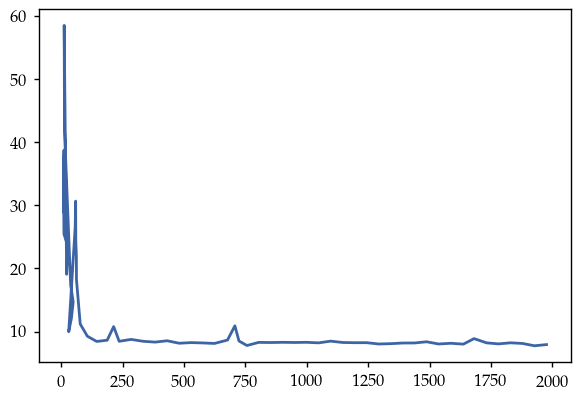

In [5]:
plt.plot(x,y)
plt.show()

In [19]:
# Basic1

folder = os.path.join(cmd,r"Results/Training","Basic1")
adv1 = np.load(os.path.join(folder,"adv_list.npy"))
mse1 = np.load(os.path.join(folder,"mse_list.npy"))
train1 = np.load(os.path.join(folder,"train_loss.npy"))
val1 = np.load(os.path.join(folder,"val_loss.npy"))
x1 = np.load(os.path.join(folder,"x_axis.npy"))

In [33]:
# log = pd.read_csv(os.path.join(cmd,r"Results/Training/Basic1","iter-prints.log"), header=None, sep=",")
import re
def read_iter_log(path):

    with open(path, "r") as f:
        log = f.readlines()

    log = [x for x in log if x!="\n"]
    content = pd.DataFrame(columns=["epoch", "gloss", "mse", "adv", "dloss", "r", "f"])

    def find_shit(string):
        e = re.findall(r"Epoch: \d+", string)[0]
        e = int(e[7:])
        gloss = re.findall("gloss: \d+.\d+", string)[0]
        gloss = float(gloss[7:])
        mse = re.findall("mse\d+.\d+", string)[0]
        mse = float(mse[3:])
        adv = re.findall("adv\d+.\d+", string)[0]
        adv = float(adv[3:])
        dloss = re.findall("dloss: \d+.\d+", string)[0]
        dloss = float(dloss[7:])
        r = re.findall("r-?\d+.\d+", string)[0]
        r = float(r[1:])
        f = re.findall("f-?\d+.\d+", string)[0]
        f = float(f[1:])
        return e, gloss, mse, adv, dloss, r,f

    def init_epoch(line_content):
        epoch = line_content[0]
        gloss = [line_content[1]]
        mse = [line_content[2]]
        adv = [line_content[3]]
        dloss = [line_content[4]]
        r = [line_content[5]]
        f = [line_content[6]]
        return epoch, gloss, mse, adv, dloss, r,f
    it =0
    while True:
        string = log[it]
        try:
            line_content = find_shit(string)
            break
        except:
            it+=1

    epoch = line_content[0]
    gloss = [line_content[1]]
    mse = [line_content[2]]
    adv = [line_content[3]]
    dloss = [line_content[4]]
    r = [line_content[5]]
    f = [line_content[6]]

    for i in range(1,len(log)):

        if "Epoch" not in log[i]:
            continue

        if "Validation" in log[i]:
            continue

        string = log[i]

        line_content = find_shit(string)

        if line_content[0] != epoch:

            gloss = np.mean(gloss)
            mse = np.mean(mse)
            adv = np.mean(adv)
            dloss = np.mean(dloss)
            r = np.mean(r)
            f = np.mean(f)

            content.loc[len(content.index)] = [epoch, gloss, mse, adv, dloss, r, f]

            epoch, gloss, mse, adv, dloss, r, f = init_epoch(line_content)
        else:
            gloss.append(line_content[1])
            mse.append(line_content[2])
            adv.append(line_content[3])
            dloss.append(line_content[4])
            r.append(line_content[5])
            f.append(line_content[6])

    return content

with open(os.path.join(cmd,r"Results/Training/Final","iter-prints.log"), "r") as f:
    log = f.readlines()

# string = log[0]
# e = re.findall(r"Epoch: \d+", string)[0]
# e = int(e[7:])
# print(e)

path = os.path.join(cmd,r"Results/Training/Final","iter-prints_SIRT.log")

df = read_iter_log(path)


print(df)

val_loss = np.load(os.path.join(cmd,r"Results/Training/Final","val_loss.npy"))

    epoch      gloss       mse        adv     dloss          r         f
0     0.0   6.486667  0.028000   6.457333  1.400000   0.014000  0.039333
1     1.0   6.252500  0.055500   6.193750  1.332500  -0.022500 -0.138250
2     2.0   5.086667  0.044333   5.040167  1.321667   0.130833 -0.025833
3     3.0   4.877500  0.030500   4.846750  1.265000   0.320250  0.015500
4     4.0   5.382500  0.063000   5.318750  1.235000  -0.050500 -0.414000
..    ...        ...       ...        ...       ...        ...       ...
95   95.0  11.700000  0.181500  11.516000  0.435000  13.552500 -0.602000
96   96.0   9.905000  0.224000   9.680500  0.475000  10.519000 -0.492000
97   97.0   9.700000  0.129500   9.566500  0.475000  12.307000 -0.490500
98   98.0  10.455000  0.260500  10.194000  0.575000   6.054500 -0.577500
99   99.0  11.110000  0.164500  10.944000  0.405000  13.957000 -0.689000

[100 rows x 7 columns]


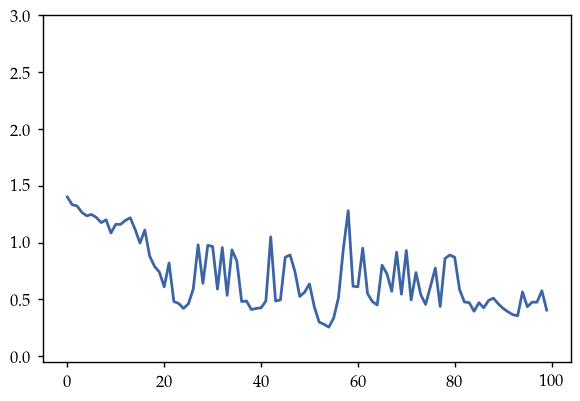

In [28]:
# plt.plot(df["epoch"], df["gloss"])
# plt.plot(df["epoch"], df["adv"])

loss = df["dloss"].to_numpy()
args = np.argwhere(loss <=20)
epochs = df["epoch"].to_numpy()[args]
gloss = df["gloss"].to_numpy()[args]
adv = df["adv"].to_numpy()[args]
dloss = df["dloss"].to_numpy()[args]


plt.plot(epochs, dloss)
plt.ylim([-0.05,3])
plt.show()

In [22]:
train1 = train1[np.where(train1 <= 1000)]
mse1 = mse1[np.where(mse1 <= 1000)]

In [23]:
f=1
mse1 = [np.mean(mse1[i-f:i+f]) for i in range(f,len(mse1)-f)]

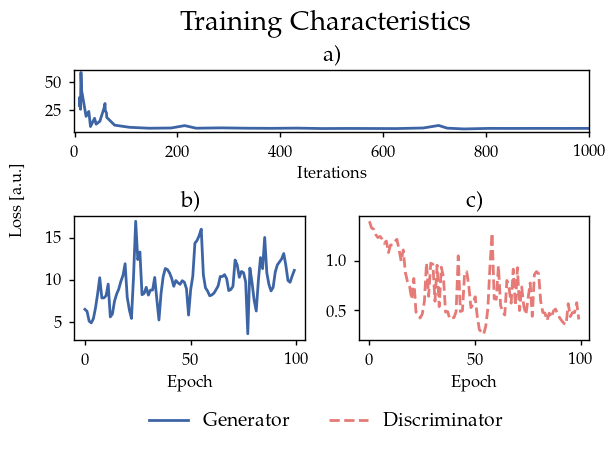

In [83]:
from matplotlib.gridspec import GridSpec
fig = plt.figure()
gs = GridSpec(3, 2, figure=fig, wspace=0, hspace=0.0)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1:, 0])
ax3 = fig.add_subplot(gs[1:, 1], sharex=ax2)

sorted = np.argsort(x)
x = x[sorted]
y = y[sorted]

ax1.plot(x,y, label="Initial Training Validation")
ax1.set_xlim([-0.1,1000])
ax1.set_xlabel("Iterations")
ax1.set_title("a)")

ax2.plot(gloss, label="Transferred Generator Loss")
handle2, = ax2.plot(adv, alpha=0)
ax2.set_xlabel("Epoch")
ax2.set_title("b)")

d_line, = ax3.plot(epochs, dloss, label="Transferred Discriminator Loss", linestyle = handle2.get_linestyle(), c= handle2.get_color(),  )
ax3.set_xlabel("Epoch")
ax3.set_title("c)")
# d_line.update_from(handle2)


plt.suptitle("Training Characteristics")
fig.text(-0.04, 0.50, 'Loss [a.u.]', ha='center', va='center', rotation='vertical')

# ax1.legend()
# ax2.legend()
# ax3.legend()
handle1 = ax1.get_legend_handles_labels()[0]

labels = ["Generator", "Discriminator"]
fig.legend(handles=[handle1[0], d_line], labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.00), frameon=False)

plt.savefig(os.path.join(cmd,r"Results/Training/","Training.pdf"), format="pdf", bbox_inches='tight')
plt.show()


In [47]:
path = os.path.join(cmd,r"Results/Training/Final","iter-prints.log")

fd = read_iter_log(path)

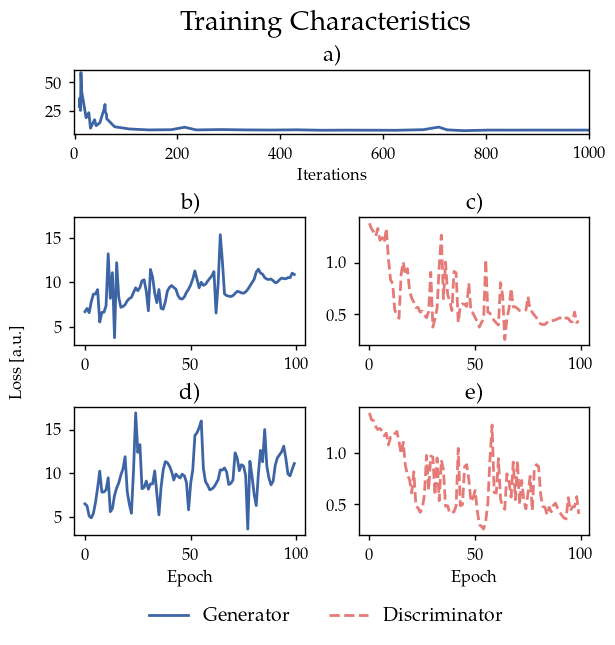

In [84]:
fig = plt.figure(figsize= (DEFAULT_FIGSIZE[0], 1.5* DEFAULT_FIGSIZE[1]))
gs = GridSpec(5, 2, figure=fig, wspace=0, hspace=0.0)  
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1:3, 0])
ax3 = fig.add_subplot(gs[1:3, 1], sharex=ax2)
ax4 = fig.add_subplot(gs[3:, 0])
ax5 = fig.add_subplot(gs[3:, 1], sharex=ax4)

sorted = np.argsort(x)
x = x[sorted]
y = y[sorted]

ax1.plot(x,y, label="Initial Training Validation")
ax1.set_xlim([-0.1,1000])
ax1.set_xlabel("Iterations")
ax1.set_title("a)")

ax2.plot(fd["gloss"], label="Transferred Generator Loss")
handle2, = ax2.plot(adv, alpha=0)
# ax2.set_xlabel("Epochs")
ax2.set_title("b)")

d_line, = ax3.plot( fd["epoch"], fd["dloss"], label="Transferred Discriminator Loss", linestyle = handle2.get_linestyle(), c= handle2.get_color(),  )
# ax3.set_xlabel("Epochs")
ax3.set_title("c)")


ax4.plot(gloss, label="Transferred Generator Loss")
# handle2, = ax2.plot(adv, alpha=0)
ax4.set_xlabel("Epoch")
ax4.set_title("d)")

d_line, = ax5.plot(dloss, label="Transferred Discriminator Loss", linestyle = handle2.get_linestyle(), c= handle2.get_color(),  )
ax5.set_xlabel("Epoch")
ax5.set_title("e)")
# d_line.update_from(handle2)


plt.suptitle("Training Characteristics")
fig.text(-0.04, 0.39, 'Loss [a.u.]', ha='center', va='center', rotation='vertical')

# ax1.legend()
# ax2.legend()
# ax3.legend()
handle1 = ax1.get_legend_handles_labels()[0]

labels = ["Generator", "Discriminator"]
fig.legend(handles=[handle1[0], d_line], labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.00), frameon=False)

plt.savefig(os.path.join(cmd,r"Results/Training/","Training.pdf"), format="pdf", bbox_inches='tight')
plt.show()

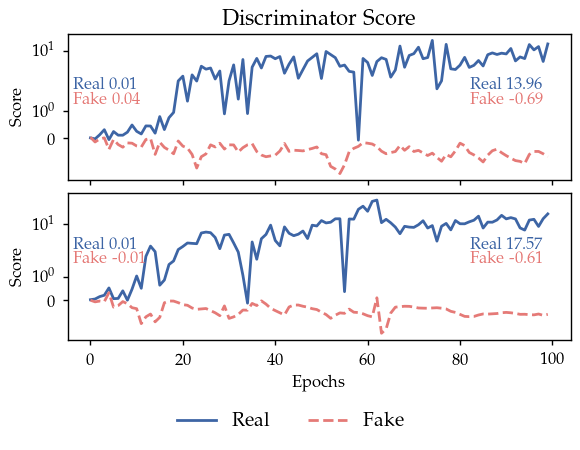

In [82]:
fig, axs = plt.subplots(2, 1, sharex=True)

dfs = [df, fd]

for i, ax in enumerate(axs):
    r = ax.plot(dfs[i]["epoch"], dfs[i]["r"], label="Real")
    f = ax.plot(dfs[i]["epoch"], dfs[i]["f"], label="Fake")
    # ax.set_xlabel("Epochs")
    ax.set_ylabel("Score")

    r_min = dfs[i]["r"][0]
    f_min = dfs[i]["f"][0]
    ax.text(0.01, 0.70, f"Real {r_min:.2f}", c= r[0].get_color(), transform=ax.transAxes, verticalalignment='top')
    ax.text(0.01, 0.60, f"Fake {f_min:.2f}", c= f[0].get_color(),transform=ax.transAxes, verticalalignment='top')

    r_end = dfs[i]["r"].to_numpy()[-1]
    f_end = dfs[i]["f"].to_numpy()[-1]
    ax.text(0.80, 0.7, f"Real {r_end:.2f}", c= r[0].get_color(), transform=ax.transAxes, verticalalignment='top')
    ax.text(0.80, 0.6, f"Fake {f_end:.2f}", c= f[0].get_color(),transform=ax.transAxes, verticalalignment='top')

axs = axs.flatten()
axs[-1].set_xlabel("Epochs")
axs[0].set_title("Discriminator Score")

# axs[-1].set_ylim([-1.5,0.5])
axs[0].set_yscale("symlog")
axs[1].set_yscale("symlog")

handles = axs[0].get_legend_handles_labels()[0]
labels = ["Real", "Fake"]

fig.legend(handles=handles, labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.00), frameon=False)

plt.savefig(os.path.join(cmd,r"Results/Training/","Discriminator.pdf"), format="pdf", bbox_inches='tight')


plt.show()

In [26]:
optimGAN = read_iter_log(os.path.join(cmd,r"Results/GANPICCS","iter-prints.log"))

In [27]:
print(optimGAN)

    epoch  gloss    mse    adv  dloss
0     0.0   7.49  0.094  7.400   1.39
1     1.0   7.45  0.093  7.352   1.39
2     2.0   7.40  0.091  7.313   1.39
3     3.0   7.36  0.086  7.278   1.38
4     4.0   7.32  0.080  7.245   1.38
..    ...    ...    ...    ...    ...
95   95.0   6.83  0.001  6.832   1.39
96   96.0   6.77  0.000  6.772   1.39
97   97.0   6.77  0.000  6.767   1.39
98   98.0   6.81  0.001  6.807   1.39
99   99.0   6.88  0.001  6.879   1.39

[100 rows x 5 columns]


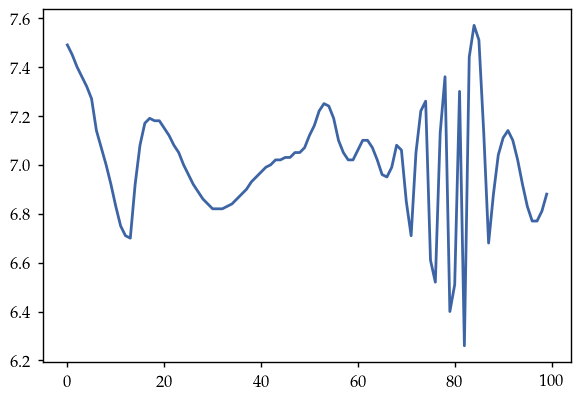

In [37]:
plt.plot(optimGAN["epoch"], optimGAN["gloss"])
# plt.plot(optimGAN["epoch"], optimGAN["dloss"])